In [ ]:
## Import all Required libraries
import pandas as pd # For data manupulation 
import numpy as np # For Numerical calculation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For Advance data visualization
from sklearn.model_selection import train_test_split # For  split the data into trin and test
from sklearn.preprocessing import StandardScaler # For scale the data
from sklearn.neighbors import KNeighborsClassifier # For Buil the KNN classifer
from sklearn.metrics import confusion_matrix ## for form a confusion matrix
from sklearn.metrics import accuracy_score # To calculate the accuracy 


In [ ]:

diabete = pd.read_csv("/diabetes.csv") # Load the data


Details about the dataset:
1.	Pregnancies decribes the number of times the person has been pregnant.
2.	Gluose describes the blood glucose level on testing.
3.	Blood pressure describes the diastolic blood pressure.
4.	Skin Thickenss describes the skin fold thickness of the triceps.
5.	Insulin describes the amount of insulin in a 2hour serum test.
6.	BMI describes he body mass index.
7.	Diabetes Pedigree Function describes the family history of the person.
8.	Age describes the age of the person
9.	Outcome describes if the person is predicted to have diabetes or not.


In [ ]:
diabete.info() # summary of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabete.head() # shows the first five data points in the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabete.describe( ) # describe statistical calculations
  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabete.isna().sum() # check null values and their sum

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabete.duplicated().sum() # check the duplicates in the data

0

#**Data** visualization 

## histogram 

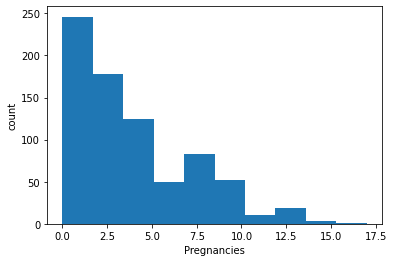

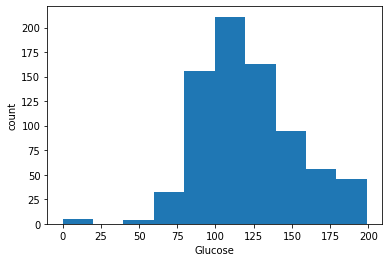

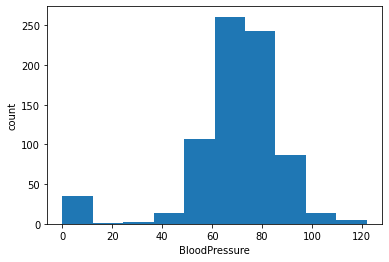

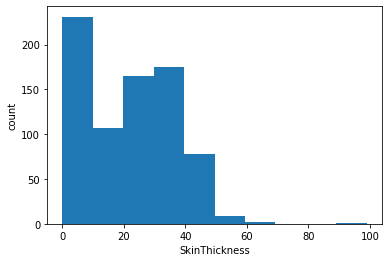

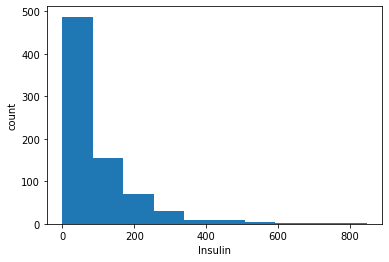

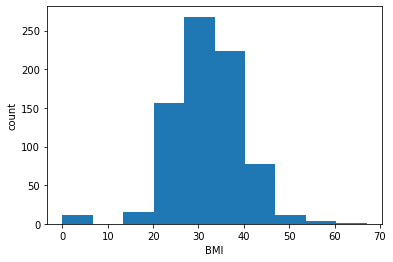

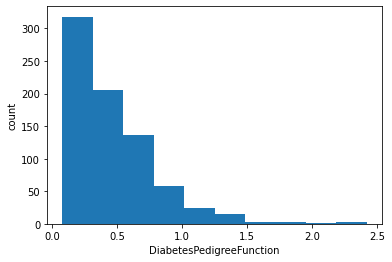

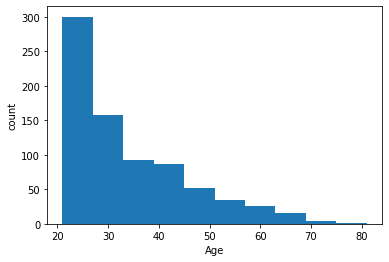

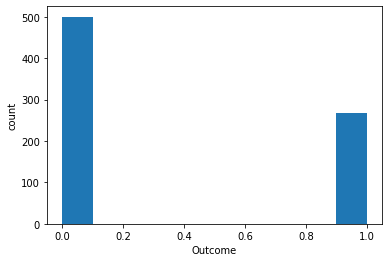

In [ ]:
for column in diabete.columns: 
  plt.hist(diabete[column])
  plt.xlabel(column)
  plt.ylabel('count')
  plt.show()

Box plot

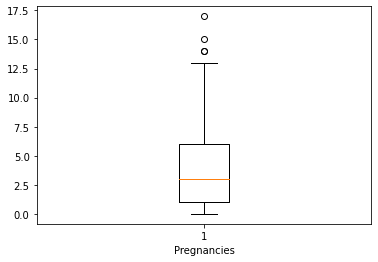

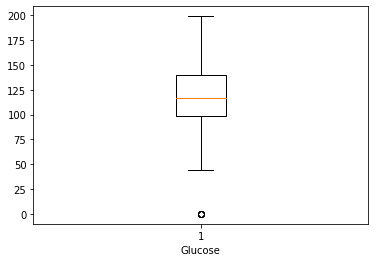

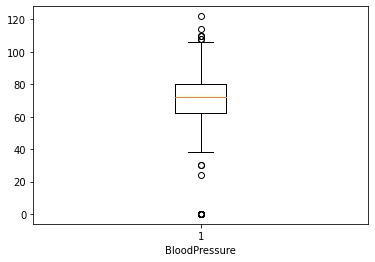

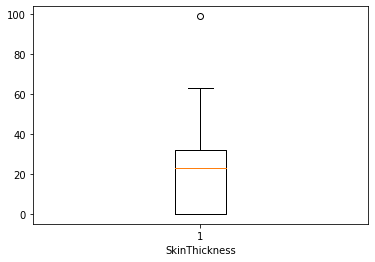

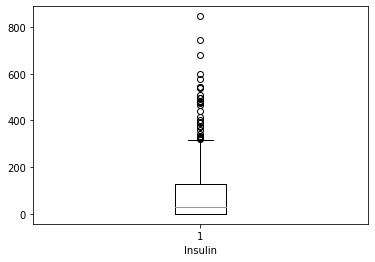

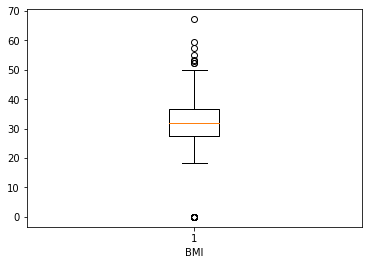

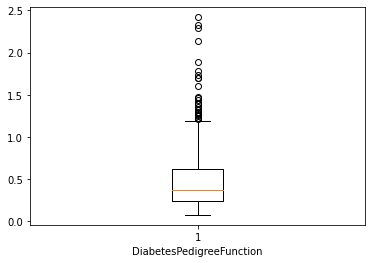

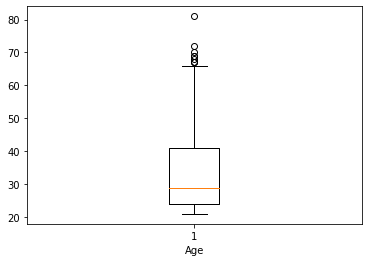

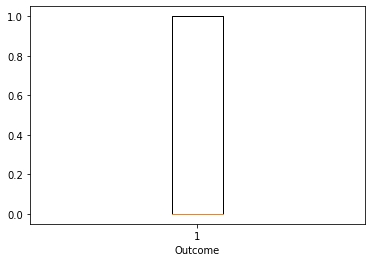

In [ ]:
for column in diabete.columns:
  plt.boxplot(diabete[column])
  plt.xlabel(column)
  plt.show()

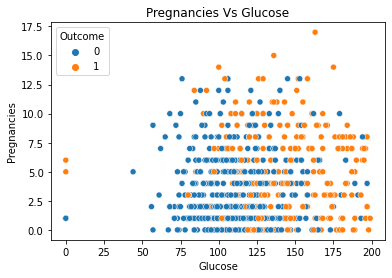

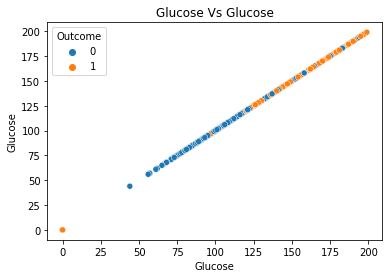

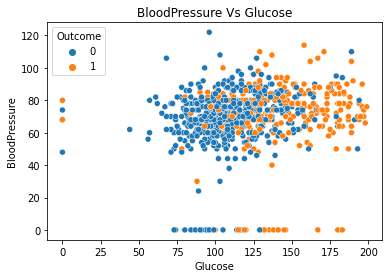

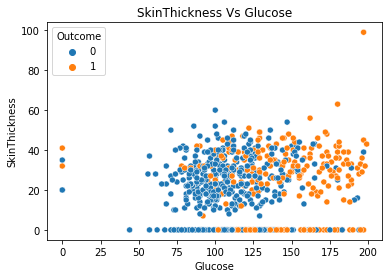

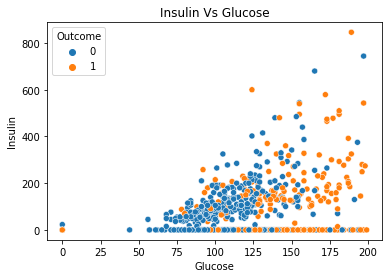

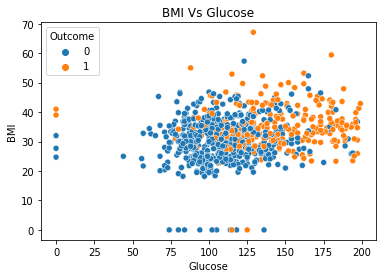

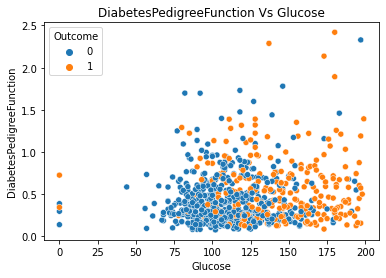

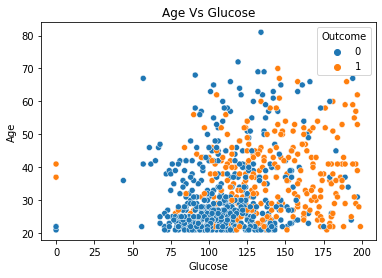

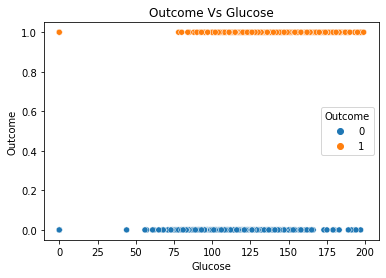

In [ ]:
## Scatter plot
for column in diabete.columns:
    sns.scatterplot(x = diabete['Glucose'], y = diabete[column], hue = diabete["Outcome"])
    plt.title (column + ' Vs Glucose')
    plt.xlabel('Glucose')
    plt.ylabel(column)
    plt.show()


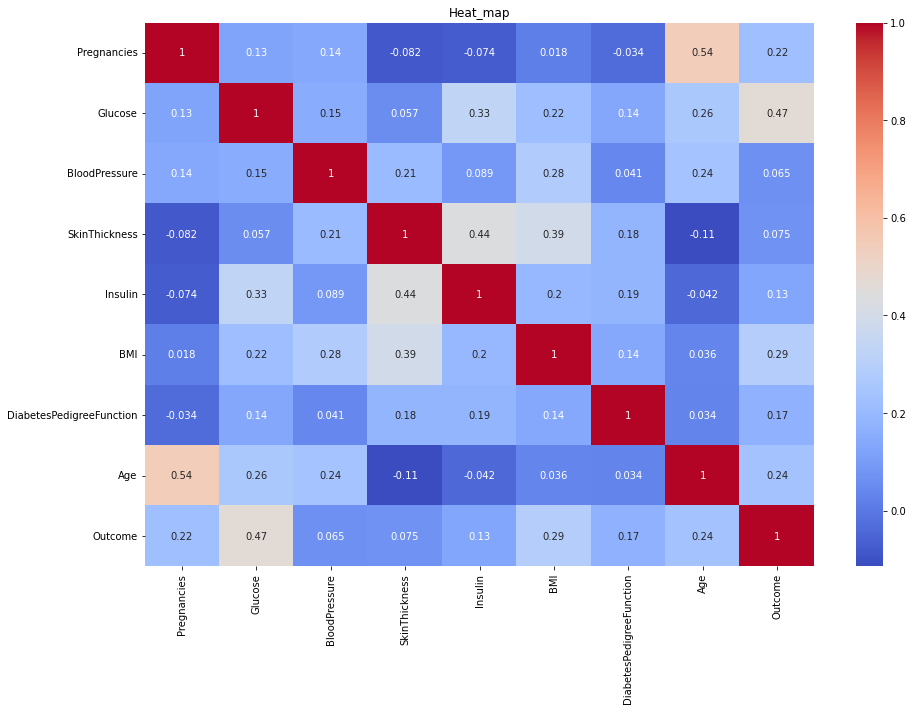

In [ ]:
## Check corelation between features
cor_mat = diabete.corr()
## Heat map 
plt.figure(figsize = (15,10))
sns.heatmap(cor_mat, xticklabels = cor_mat.columns, yticklabels = cor_mat.columns, cmap = 'coolwarm', annot = True)
plt.title('Heat_map')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


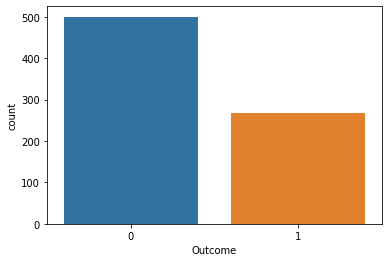

In [ ]:

# count plot
sns.countplot(diabete['Outcome'])


## Feature scaling

In [ ]:

indep_fea = diabete.iloc[ :, 0 : -1] # input features
dep_fea = diabete.iloc[:,-1] # output variable


In [ ]:
## check data first five rows
indep_fea.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
## scale the data
SC = StandardScaler() 
indep_fea = SC.fit_transform(indep_fea)
indep_fea [0] # after scaling the data first row

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [ ]:
## split the data into training and testing
train_x, test_x, train_y, test_y = train_test_split(indep_fea, dep_fea, random_state = 9, test_size = 0.2)


In [ ]:
## Build the KNN Classifier 
knn = KNeighborsClassifier(n_neighbors = 25) ## Intialize the parameters
knn.fit(train_x, train_y) # Train the model on training data


KNeighborsClassifier(n_neighbors=25)

0.7272727272727273

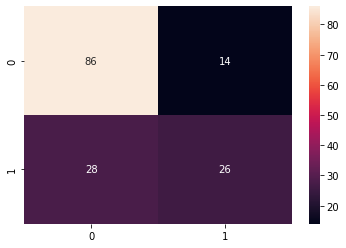

In [ ]:
# predict on test data and check the accuracy of the model
y_pred = knn.predict(test_x) # predict the values on test data 
cm = confusion_matrix(test_y, y_pred) # confusion matrix on testdata
sns.heatmap(cm, annot =True)
accuracy_score(test_y, y_pred) # To find the accuracy of the test data


In [ ]:
## testing on the train data
pred_tr = knn.predict(train_x) # prediction on training data

accuracy_score(train_y, pred_tr) # find training accuracy


0.7736156351791531

## Build the Decision tree model on the data for better accuracy

In [ ]:
## build the model on Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier as DT
dt_mb = DT(criterion = 'entropy') # intialize the parameters
dt_mb.fit(train_x, train_y) # build the decision tree algorithm


DecisionTreeClassifier(criterion='entropy')

0.7337662337662337

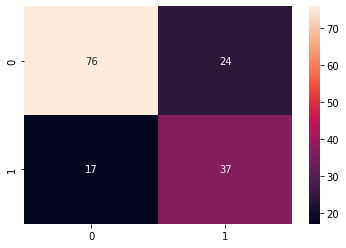

In [ ]:
# predict on test data and find the accuracy of the test data
pred_yd = dt_mb.predict(test_x) # predict the values on test data 
cm_d = confusion_matrix(test_y, pred_yd) # confusion matrix on testdata
sns.heatmap(cm_d, annot = True)
accuracy_score(test_y, pred_yd)  # To find the accuracy of the test data


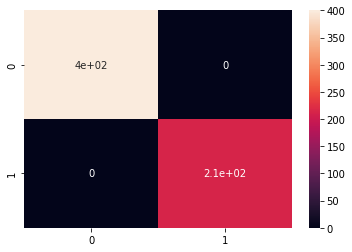

In [ ]:
pred_tr = dt_mb.predict(train_x) # predict on training data
confusion_matrix(train_y, pred_tr)
accuracy_score(train_y, pred_tr) # find accuracy on training data
cm_dt = confusion_matrix(train_y, pred_tr) # confusion matrix on train data
sns.heatmap(cm_dt, annot = True)

Training accuracy is very high compared to Testing accuracy so the model is overfit

In [ ]:
### Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf': [1, 3, 5, 8, 10, 13, 15, 20],
              'max_depth': [1, 2, 4, 6, 8, 10],
              'max_features': ['sqrt']}


In [ ]:
# using GridSearch
grid_search = GridSearchCV(estimator = dt_mb, param_grid = param_grid, scoring = 'accuracy', cv = 5,
                           refit = True, return_train_score = True)


In [ ]:
# Train the model
grid_search.fit(train_x, train_y)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5, 8, 10, 13, 15, 20]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# check the best parameters and model
grid_search.best_params_


{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 20}

In [ ]:
dt_best = grid_search.best_estimator_


In [ ]:
## check the traing and testing accuracy
print(accuracy_score(test_y, dt_best.predict(test_x)))
accuracy_score(train_y, dt_best.predict(train_x)) 


0.7532467532467533


0.7801302931596091